Assign1: Data Exploration
Due Date: Sep 9th (Friday), before midnight (11:59:59PM; EDT)

Download the Online News Popularity dataset from the UCI Machine Learning repository. This dataset has 61 attributes and 39644 points. You will ignore the following attributes for this assignment: 0-1, and 13-38. So, you'll be left with 33 attributes that you'll use. Complete the following tasks.

Mean vector and total variance
Compute the mean vector μμ for the data matrix, and then compute the total variance var(D)var(D); see Eq. (1.8) for the latter.

Covariance matrix (inner and outer product form)
Compute the sample covariance matrix ΣΣ as inner products between the attributes of the centered data matrix (see Eq. (2.38) in chapter 2). Next compute the sample covariance matrix as sum of the outer products between the centered points (see Eq. (2.39)).

Correlation matrix as pair-wise cosines
Compute the correlation matrix for this dataset using the formula for the cosine between centered attribute vectors (see Eq. (2.30)).

Output which attribute pairs are i) the most correlated, ii) the most anti-correlated, and iii) the least correlated? You must print the "actual" names of these columns as well as the dimension index. For example, for the 33 valid dimensions, the first dimension is named "n_tokens_title". You can find the names and descriptions of all the valid attributes on the UCI dataset link above (you can get them from the first line of the csv file; do not hard code the names).

Visualization
Create the scatter plots for the three interesting pairs using matplotlib and visually confirm the trends, i.e., describe how each of the three cases results in a particular type of plot. Based on the attribute description, do the results make sense? Why or why not?

(CSCI 6390 Only) Change of basis
Create a new orthogonal basis for the dataset as follows: First, set the seed as np.random.seed(42) so that everyone will get the same answer. Next, generate a new orthonormal basis for the data as follows: First, generate a random dd-dimensional vector using np.random.random_sample, and set it as the new first dimension U0U 
0
​
  after making it a unit vector. For the second dimension, generate a random dd-dimensional vector and remove its projection along U0U 
0
​
 , and make it a unit vector to obtain the new second dimension, U1U 
1
​
 . For the third dimension, first generate a random dd-dimensional vector and remove its projections along U0U 
0
​
  and then U1U 
1
​
 , and then make it a unit vector, which gives you U2U 
2
​
 . In general, for the ii-th new dimension UiU 
i
​
 , first generate a random dd-dimensional vector and then subtract its projection along all previous dimensions UjU 
j
​
 , where j<ij<i, and then make it a unit vector. This will give you a new orthogonal (and normal) basis for the data. This procedure is called the Gram-Schmidt Orthogonalization.

Finally, you have to project the original data into the new space to obtain the coordinates of each point. This can be done by creating a matrix UU whose columns are U0,U1,U2,...,UdU 
0
​
 ,U 
1
​
 ,U 
2
​
 ,...,U 
d
​
 , and then simply multiplying the original data DD by UU, i.e., new data D′=DUD 
′
 =DU.

Finally, compute the total variance of D′D 
′
  in the new basis and compare it with the total variance of DD in the original basis. What happens?

Submission
Submit your code via submitty. Name your jupyter notebook: assign1.ipynb. You must use Python 3 (only versions 3.9 or 3.10).

You may assume that the input CSV data file OnlineNewsPopularity.csv resides in the local directory of the notebook. You MUST NOT hard code the file path, rather use "./OnlineNewsPopularity.csv" as the filename, and do not change or manipulate the input file in any way. All feature subset selection must take place inside the notebook. This way the TAs can run your notebook with ease.

The notebook should contain the executed output of each cell and plots, and you must add comment blocks corresponding to the different subtasks (e.g., mean vector and total variance, covariance matrix, etc), so the TAs can quickly check the results.

The output of the different blocks should comprise the mean vector, total variance, covariance matrix via inner and via outer product, correlation matrix, and the scatter plots (using matplotlib). Your observations on which attributes are most, least, and anti-correlated must appear as comment blocks in the notebook.

CSCI6390 students must also show the code for change of basis, and the output for the total variance in the new space, and their answer as a comment block.

Note that you are allowed to use built-in NumPy/Python functions/libraries (e.g., csv) for reading and parsing the input file, but you should NOT use any of the built-in functions like cov for this assignment. You may however verify your answers by comparing to the results from the built-in methods.

Tutorial on Python and NumPy
For those not that familiar with python or NumPy, you may search online for tutorials, e.g. Python Tutorial or NumPy Doc.

Policy on Academic Honesty
You are free to discuss how to tackle the assignment, but all coding must be your own. Please do not copy or modify code from anyone else, including code on the web. Any students caught violating the academic honesty principle will get an automatic F grade on the course and will be referred to the dean of students for disciplinary action.

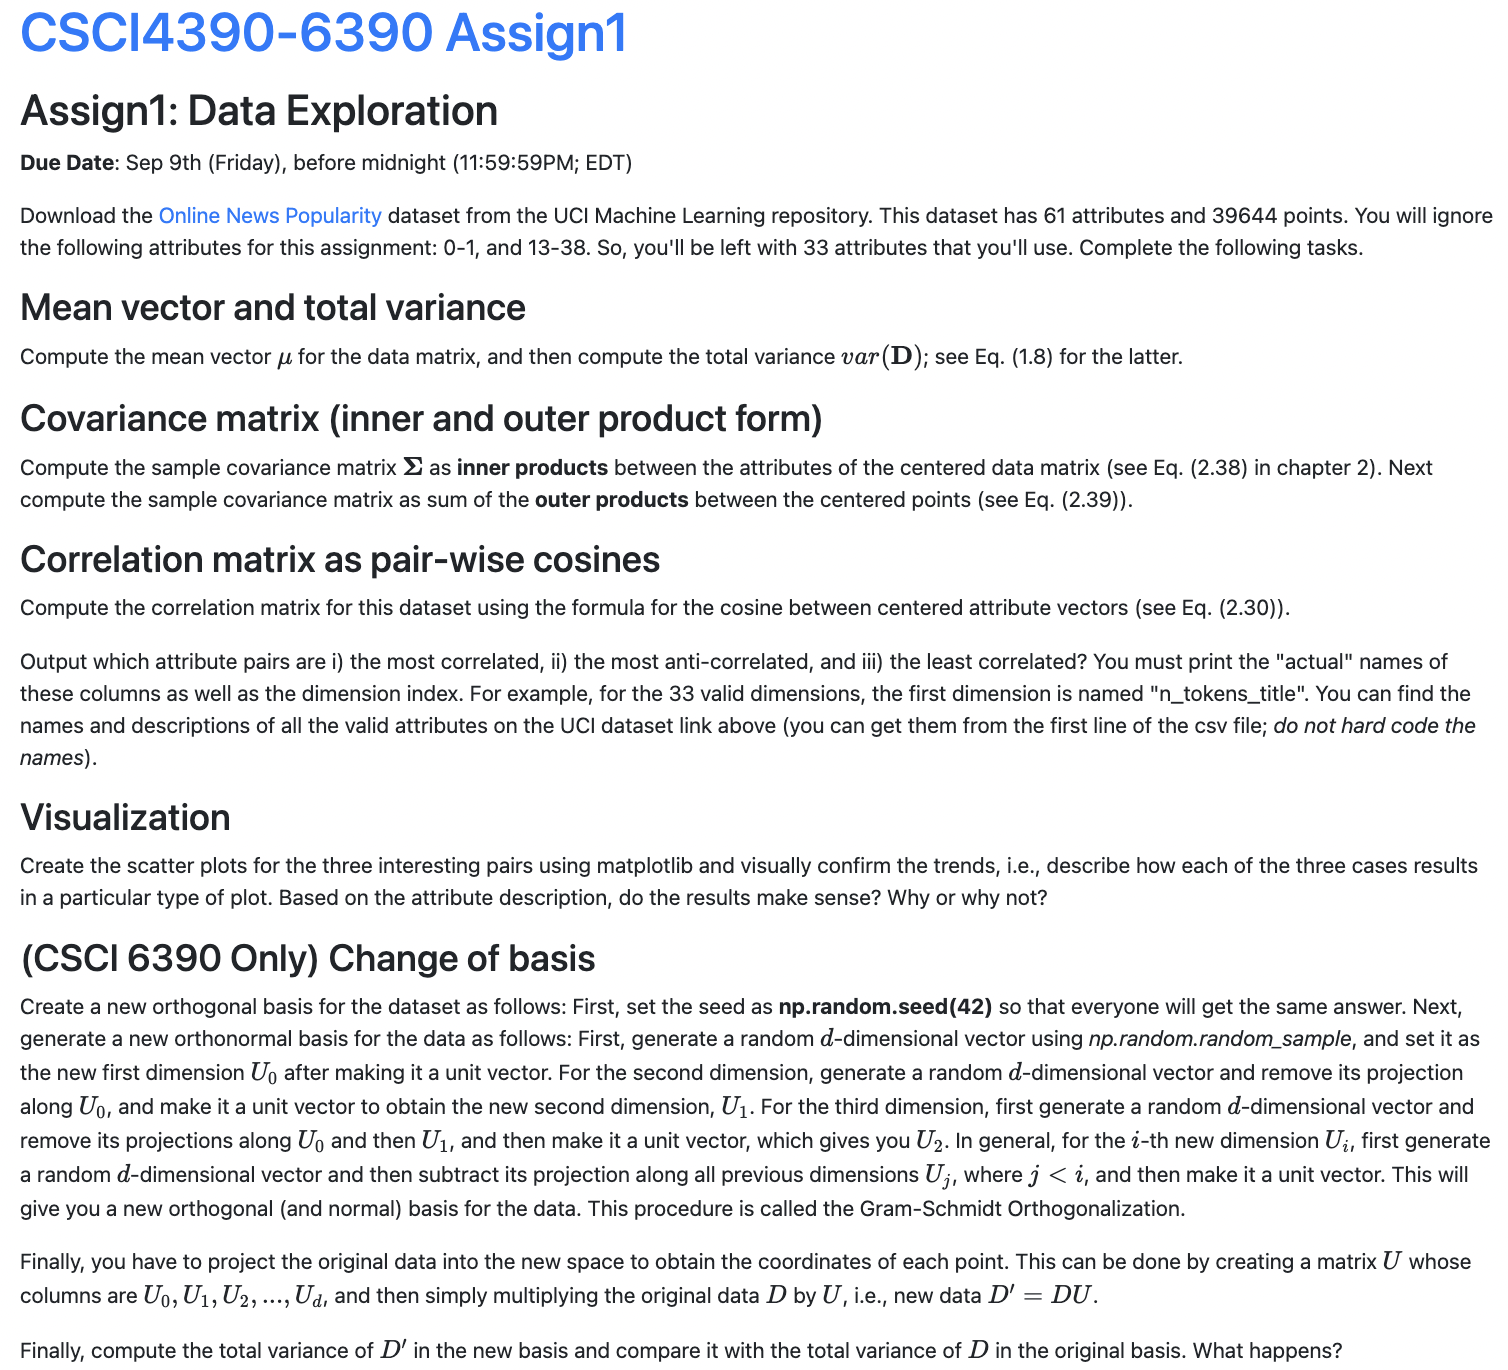

Importing Libraries: pandas and numpy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reading the data set OnlineNewsPopularity.csv

In [5]:
df = pd.read_csv('OnlineNewsPopularity.csv')
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

removing columns which are not required and creating df1 which is the final dataset

In [6]:
c1 = df[df.columns[2:13]]
c2 = df[df.columns[39:]]
df1 = pd.concat([c1, c2], axis=1)
df1

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


Mean vector of column attributes. df_mean contains the mean vector

In [7]:
df2 = df1.sum()
df_mean = df2/len(df1)
print('==============Mean Vector=================')
print(df_mean)

==============Mean Vector=================
 n_tokens_title                    10.398749
 n_tokens_content                 546.514731
 n_unique_tokens                    0.548216
 n_non_stop_words                   0.996469
 n_non_stop_unique_tokens           0.689175
 num_hrefs                         10.883690
 num_self_hrefs                     3.293638
 num_imgs                           4.544143
 num_videos                         1.249874
 average_token_length               4.548239
 num_keywords                       7.223767
 LDA_00                             0.184599
 LDA_01                             0.141256
 LDA_02                             0.216321
 LDA_03                             0.223770
 LDA_04                             0.234029
 global_subjectivity                0.443370
 global_sentiment_polarity          0.119309
 global_rate_positive_words         0.039625
 global_rate_negative_words         0.016612
 rate_positive_words                0.682150
 rate_negati

Total variance of the dataset

In [8]:
df_u = df1-df_mean
np.sum(df_u.loc[0])
variance = np.sum(np.sum(df_u**2))/df1.shape[0]
print("==============total variance=================\n",variance)

==============total variance=================
 135404799.73772174


In [9]:
np.sum(np.var(df1))


135404799.7377218

covariance inner product

In [10]:
d_bar = df1-df_mean
inner_product = np.dot(d_bar.T, d_bar)/df1.shape[0]
print('==============covariance inner product=================\n',inner_product)

==============covariance inner product=================
 [[ 4.46903889e+00  1.80854387e+01 -3.95820555e-02 ... -5.86494607e-02
   1.93982451e-02  2.15881875e+02]
 [ 1.80854387e+01  2.21936686e+05 -7.85621983e+00 ...  6.34662705e-01
   1.43271448e+00  1.34688547e+04]
 [-3.95820555e-02 -7.85621983e+00  1.23950745e+01 ... -6.14309369e-03
  -3.35931915e-03  3.30070096e+01]
 ...
 [-5.86494607e-02  6.34662705e-01 -6.14309369e-03 ...  3.56410689e-02
  -1.71000855e-02  3.25079931e+00]
 [ 1.93982451e-02  1.43271448e+00 -3.35931915e-03 ... -1.71000855e-02
   5.12077722e-02  7.13940172e+01]
 [ 2.15881875e+02  1.34688547e+04  3.30070096e+01 ...  3.25079931e+00
   7.13940172e+01  1.35182574e+08]]


covariance outer product

In [11]:
x_bar = df1-df_mean
x1_bar = np.array(x_bar)
op = np.zeros((x1_bar.shape[1],x1_bar.shape[1]))
for i in range(33):
    for j in range(33):
        op[i,j] = np.dot(x1_bar[:,i], x1_bar[:,j].T)
outer_prd = op/x1_bar.shape[0]
print('==============covariance outer product=================\n',outer_prd)
        


==============covariance outer product=================
 [[ 4.46903889e+00  1.80854387e+01 -3.95820555e-02 ... -5.86494607e-02
   1.93982451e-02  2.15881875e+02]
 [ 1.80854387e+01  2.21936686e+05 -7.85621983e+00 ...  6.34662705e-01
   1.43271448e+00  1.34688547e+04]
 [-3.95820555e-02 -7.85621983e+00  1.23950745e+01 ... -6.14309369e-03
  -3.35931915e-03  3.30070096e+01]
 ...
 [-5.86494607e-02  6.34662705e-01 -6.14309369e-03 ...  3.56410689e-02
  -1.71000855e-02  3.25079931e+00]
 [ 1.93982451e-02  1.43271448e+00 -3.35931915e-03 ... -1.71000855e-02
   5.12077722e-02  7.13940172e+01]
 [ 2.15881875e+02  1.34688547e+04  3.30070096e+01 ...  3.25079931e+00
   7.13940172e+01  1.35182574e+08]]


Correlation matrix as pair-wise cosines

In [12]:
r_size = df1.shape[1]
cov = np.zeros([r_size, r_size])
for i in range(r_size):
    for j in range(r_size):
        x1 = x1_bar[:, i]
        x2 = x1_bar[:, j]
        x1_norm = np.sqrt(np.sum(x1**2))
        x2_norm = np.sqrt(np.sum(x2**2))
        x1 = x1/x1_norm 
        x2 = x2/x2_norm 
        
        cov[i][j] = np.dot(x1.T, x2)

print("==============Correlation matrix as pair-wise cosines=================\n", cov)

==============Correlation matrix as pair-wise cosines=================
 [[ 1.00000000e+00  1.81596482e-02 -5.31822498e-03 ... -1.46954062e-01
   4.05496802e-02  8.78311884e-03]
 [ 1.81596482e-02  1.00000000e+00 -4.73668505e-03 ...  7.13597090e-03
   1.34393158e-02  2.45898435e-03]
 [-5.31822498e-03 -4.73668505e-03  1.00000000e+00 ... -9.24245210e-03
  -4.21656456e-03  8.06345661e-04]
 ...
 [-1.46954062e-01  7.13597090e-03 -9.24245210e-03 ...  1.00000000e+00
  -4.00271787e-01  1.48099790e-03]
 [ 4.05496802e-02  1.34393158e-02 -4.21656456e-03 ... -4.00271787e-01
   1.00000000e+00  2.71352310e-02]
 [ 8.78311884e-03  2.45898435e-03  8.06345661e-04 ...  1.48099790e-03
   2.71352310e-02  1.00000000e+00]]


Output which attribute pairs are i) the most correlated, ii) the most anti-correlated, and iii) the least correlated? You must print the "actual" names of these columns as well as the dimension index.

In [13]:
most_correlated = [0,1]
most_anti_correlated = [0,0]
least_correlated = [0,0]

for i in range(r_size):
    for j in range(r_size):
        if cov[i][j] > cov[most_correlated[0]][most_correlated[1]] and i != j:
            most_correlated = [i,j]
        if cov[i][j] < cov[most_anti_correlated[0]][most_anti_correlated[1]] and i != j:
            most_anti_correlated = [i,j]
        if abs(cov[i][j]) < abs(cov[least_correlated[0]][least_correlated[1]]) and i != j:
            least_correlated = [i,j]
print('most correlated columns: [' ,most_correlated[0],',', df1.columns[most_correlated[0]],'] [' ,most_correlated[1],',', df1.columns[most_correlated[1]],']')                                     
print('most anti correlated columns: [' ,most_anti_correlated[0],',', df1.columns[most_anti_correlated[0]],'] [' ,most_anti_correlated[1],',', df1.columns[most_anti_correlated[1]],']')
print('least correlated columns: [' ,least_correlated[0],',', df1.columns[least_correlated[0]],'] [' ,least_correlated[1],',', df1.columns[least_correlated[1]],']')
      

most correlated columns: [ 2 ,  n_unique_tokens ] [ 4 ,  n_non_stop_unique_tokens ]
most anti correlated columns: [ 17 ,  global_sentiment_polarity ] [ 21 ,  rate_negative_words ]
least correlated columns: [ 2 ,  n_unique_tokens ] [ 18 ,  global_rate_positive_words ]


Visualization

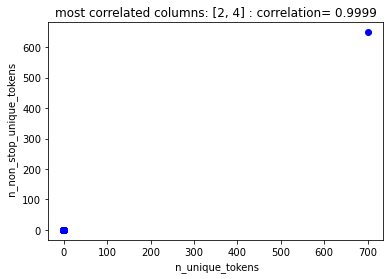

In [14]:
plt.scatter(np.array(x1_bar[:, most_correlated[0]]), np.array(x1_bar[:, most_correlated[1]]), c="blue")
tit = "most correlated columns: " + str(most_correlated) + " : correlation= " + "{0:.4f}".format(cov[most_correlated[0]][most_correlated[1]])
plt.xlabel(df1.columns[most_correlated[0]])
plt.ylabel(df1.columns[most_correlated[1]])
plt.title(tit)
plt.show()



The graph show the attributes n_unique_tokens and n_non_stop_unique_tokens in upward trend which means that the correlation is positive. It makes sense that these attributes have high positive correlation based on the description because n_unique_tokens gives rate of unique words in the content and n_non_stop_unique_tokens gives rate of unique non-stop words in the content. both of the attributes are related to rate of unique words.

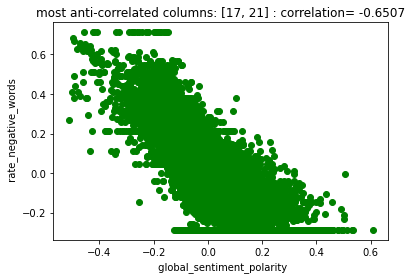

In [15]:
plt.scatter(np.array(x1_bar[:, most_anti_correlated[0]]), np.array(x1_bar[:, most_anti_correlated[1]]), c="green")
tit = "most anti-correlated columns: " + str(most_anti_correlated) + " : correlation= " + "{0:.4f}".format(cov[most_anti_correlated[0]][most_anti_correlated[1]])
plt.xlabel(df1.columns[most_anti_correlated[0]])
plt.ylabel(df1.columns[most_anti_correlated[1]])
plt.title(tit)
plt.show()

The graph show the attributes global_sentiment_polarity and rate_negative_words in downward trend which means that the correlation is negative. It makes sense that these attributes have high negative correlation based on the description because global_sentiment_polarity gives text sentiment polarity and rate_negative_words gives rate of negative words among non-neutral tokens. it is natural that as negative words increase sentiment worsens. 

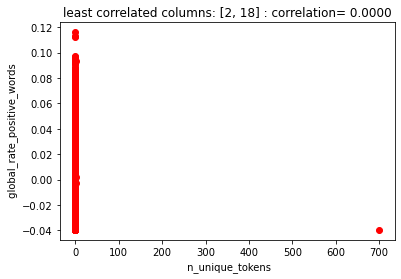

In [16]:
plt.scatter(np.array(x1_bar[:, least_correlated[0]]), np.array(x1_bar[:, least_correlated[1]]), c="red")
tit = "least correlated columns: " + str(least_correlated) + " : correlation= " + "{0:.4f}".format(cov[least_correlated[0]][least_correlated[1]])
plt.xlabel(df1.columns[least_correlated[0]])
plt.ylabel(df1.columns[least_correlated[1]])
plt.title(tit)
plt.show()

The graph show the attributes n_unique_tokens and global_rate_positive_words. here there is no clear pattern which means that the correlation is low. It makes sense that these attributes have low correlation based on the description because n_unique_tokens gives rate of unique words in the content and global_rate_positive_words gives rate of positive words in the content. the unique tokens can be positive or negative hence the correlation is low.

(CSCI 6390 Only) Change of basis

In [17]:
np.random.seed(42)

def norm(u):
    return np.sqrt(np.sum(u**2))

def unit(u):
    return u/norm(u)
    
def generate_u():
    return np.random.random_sample(33)

def orth_proj_uj(uj,ai):
    return (np.dot(uj,ai) / (norm(uj)**2)) * uj

new_basis=np.zeros([r_size,r_size])
u0 = unit(generate_u())
new_basis[:,0] = u0

for i in range(1,r_size): 
    new_a_vec = generate_u()
    total_orth_proj = 0
    for j in range(i):
        total_orth_proj += orth_proj_uj(new_basis[:,j],new_a_vec)
        ui = new_a_vec - total_orth_proj
    new_basis[:,i] = unit(ui)
    
print(print("==============New Basis=================\n", new_basis))
new_basis_df = pd.DataFrame(new_basis)
d_dash = np.dot(df1,new_basis_df)
d_dash

==============New Basis=================
 [[ 0.12856975  0.26119918 -0.19640384 ...  0.17427941  0.06254024
  -0.13122354]
 [ 0.32635516  0.08598773 -0.03782149 ...  0.03175036  0.0279979
  -0.03522024]
 [ 0.25127422  0.09216527 -0.31051181 ...  0.04529381  0.1080767
  -0.01505908]
 ...
 [ 0.20855413 -0.04915104  0.02402103 ... -0.24371222  0.21587443
   0.10583935]
 [ 0.05853644  0.05850493  0.1167031  ... -0.05123972 -0.04406262
  -0.04044229]
 [ 0.0223305   0.19647976 -0.09629284 ... -0.33012758  0.03043524
  -0.1048692 ]]
None


array([[  89.03051663,  140.36712616,  -66.1001196 , ..., -185.26588373,
          26.8428319 ,  -69.75642128],
       [ 103.07141335,  165.05133838,  -78.25497679, ..., -223.93907899,
          31.30108736,  -83.29237748],
       [ 106.06387917,  317.42370018, -152.20546239, ..., -485.62490572,
          54.22574062, -164.68247864],
       ...,
       [ 195.07842273,  418.9088447 , -198.43650189, ..., -613.1077897 ,
          69.30649068, -211.22540248],
       [ 250.76299281,  279.48354269, -131.30140246, ..., -339.41255271,
          53.86071809, -138.28812272],
       [  84.23720855,  272.74079098, -131.18900046, ..., -421.04845588,
          46.27877692, -142.97316073]])

In [18]:
d_dash_mean = np.sum(pd.DataFrame(d_dash))
d_dash_mean = d_dash_mean/d_dash.shape[0]
d_dash_mean

0      259.867837
1      720.687996
2     -347.252911
3     -213.881596
4     -302.437879
5     1083.463716
6      798.705159
7      202.379048
8      851.849913
9     -234.662993
10     322.020880
11    1002.152886
12    -696.338480
13     373.631271
14    -385.877306
15    -594.483741
16     444.913836
17    -428.093323
18    -845.808188
19    -573.103385
20     138.155300
21     381.761350
22    1092.282310
23    -172.380004
24     706.224116
25    -757.401229
26     687.062487
27     398.615546
28    -467.943053
29     117.958294
30   -1100.658521
31     120.635148
32    -373.733015
dtype: float64

In [19]:
d_dash_u = np.array(d_dash)-np.array(d_dash_mean)

variance = np.sum(np.sum(d_dash_u**2))/d_dash.shape[0]
print("==============total variance of D'=================\n",variance)


==============total variance of D'=================
 135404799.73771676


The variance after projecting the original data on the new basis is approximatly same, the total variance after basis change is slightly greater than the total variance of original data which can be attributed to rounding off errors. the difference is shown in the below cell. the variance is in the order of 100 Million and the difference is in the order of 10 thousands.